In [140]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import numpy as np 
sns.set()

In [141]:
# get directory
os.getcwd()
os.chdir('C:\\Users\\Administrator\\PycharmProjects\\Pheonix Egg\\Wine Project')

In [142]:
#download data
wine = pd.read_csv('winequality-red.csv')
wine = wine.dropna()
wine.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [143]:
#check data
wine.info()
#Checking data whether there is any missing value in the data or not. 
#Apparently, there is no missing value for this data set. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 162.4 KB


In [144]:
#drop duplicated data
wine = wine.drop_duplicates(keep = 'first')
wine.info()
#. I have found that there are some duplicated rows. 
#For the purpose of this experiment, we will treat the duplicated row as one. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1359 non-null float64
volatile acidity        1359 non-null float64
citric acid             1359 non-null float64
residual sugar          1359 non-null float64
chlorides               1359 non-null float64
free sulfur dioxide     1359 non-null float64
total sulfur dioxide    1359 non-null float64
density                 1359 non-null float64
pH                      1359 non-null float64
sulphates               1359 non-null float64
alcohol                 1359 non-null float64
quality                 1359 non-null int64
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


In [145]:
#get basic stat
wine.describe()
#checking outlier and missing value. So far, everything seems ok. 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


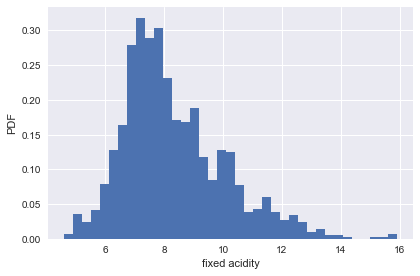

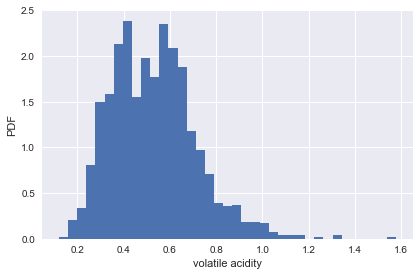

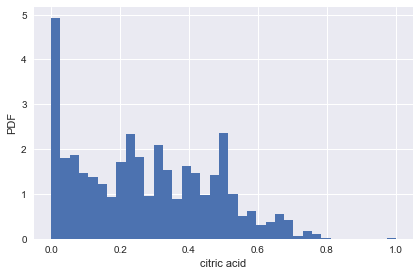

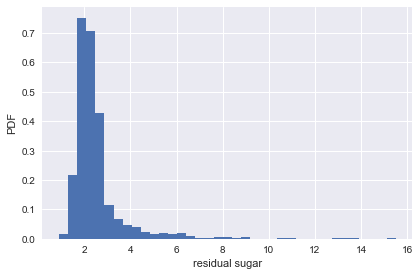

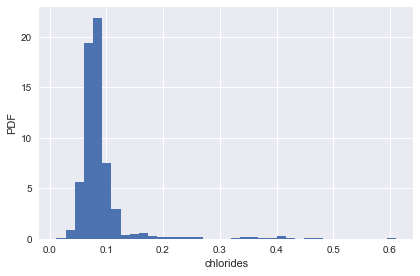

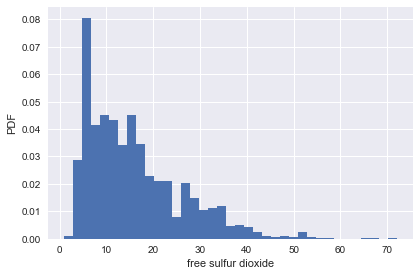

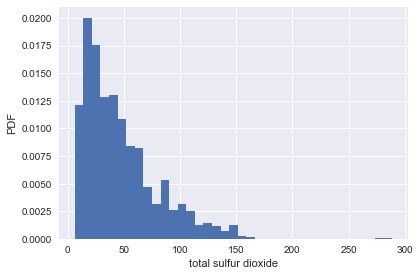

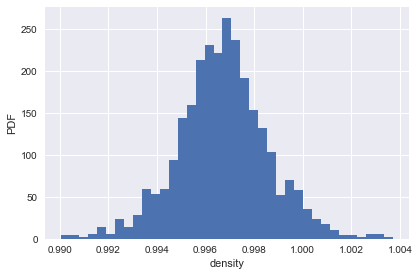

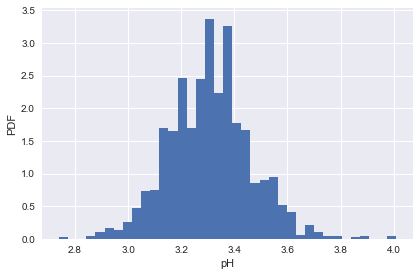

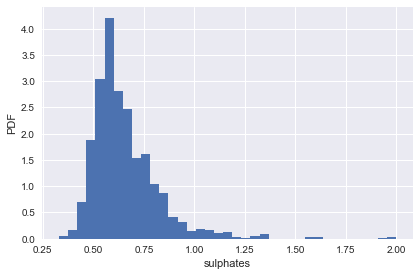

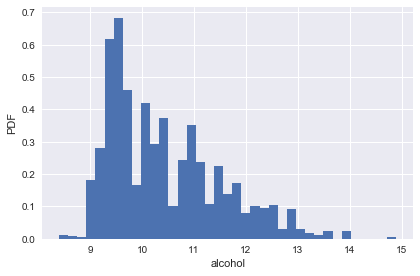

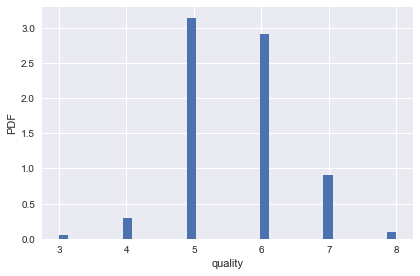

In [146]:
# ploting histogram to spot outlier vistually. 
for column in wine.columns: 
    _ = plt.hist(wine[column], bins=37, normed=True)
    _ = plt.xlabel(column)
    _ = plt.ylabel('PDF')
    plt.tight_layout()
    plt.show()
# Each histogram seems normal. 
# There are some extreme value, but they are still actceptable according to the meaning of parameters 
 
    


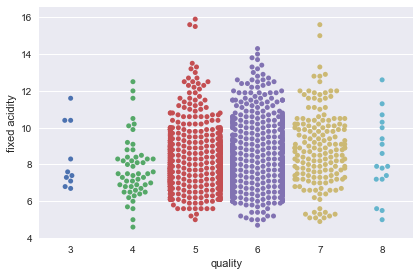

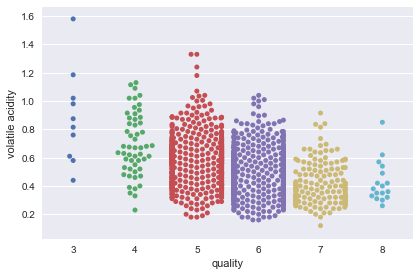

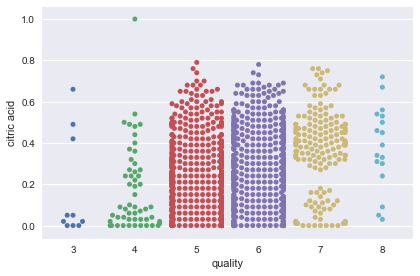

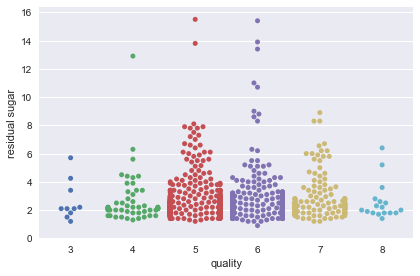

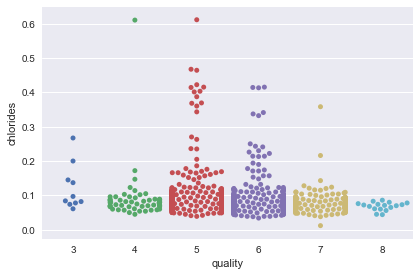

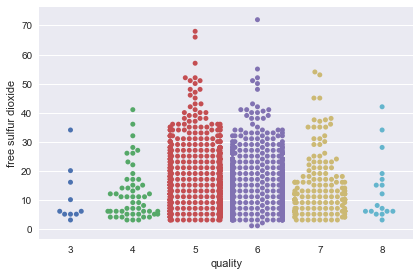

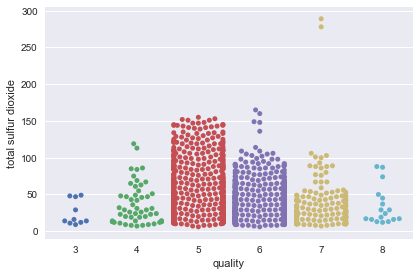

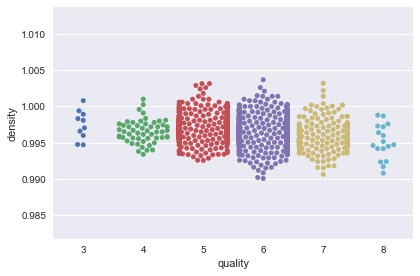

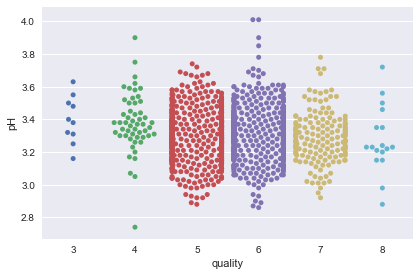

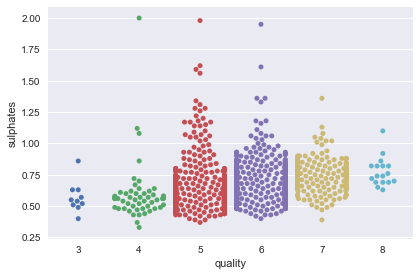

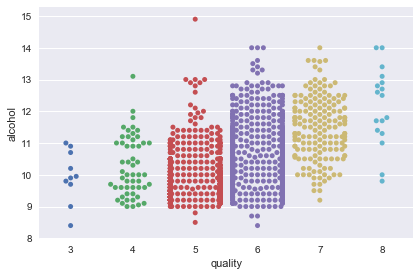

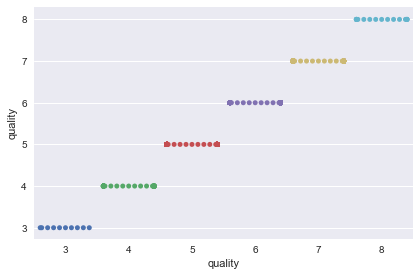

In [160]:
#Is there any correlationship betweeen physicochemical properties and rating ? 
for column in wine.columns: 
    _ = sns.swarmplot(x="quality", y= column, data=wine)
    _ = plt.xlabel('quality')
    _ = plt.ylabel(column)
    plt.tight_layout()
    plt.show()

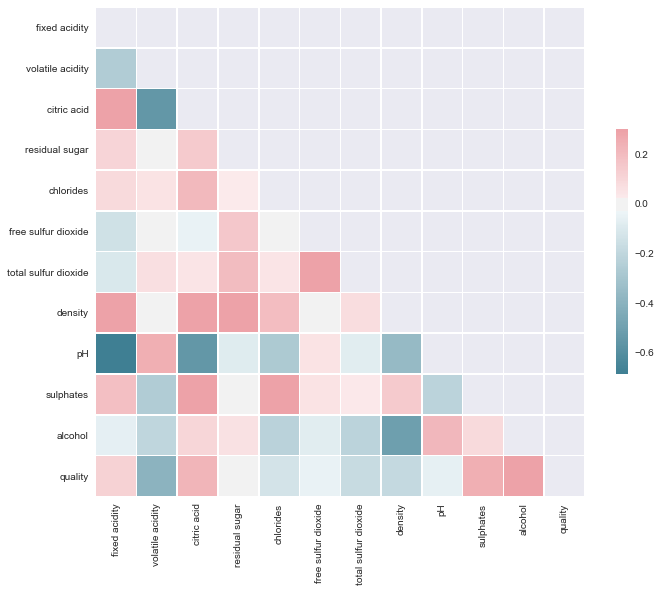

In [185]:
# discovering correlation between variable
corr = wine.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)


sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

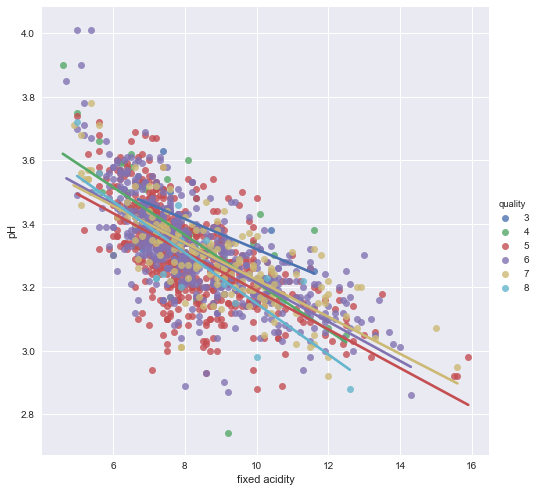

In [204]:
g = sns.lmplot(x="fixed acidity", y="pH", hue="quality",
               truncate=True, size=7, data=wine, ci = 0)
g.set_axis_labels("fixed acidity", "pH")
with sns.color_palette("PuBuGn_d") :
    plt.show()

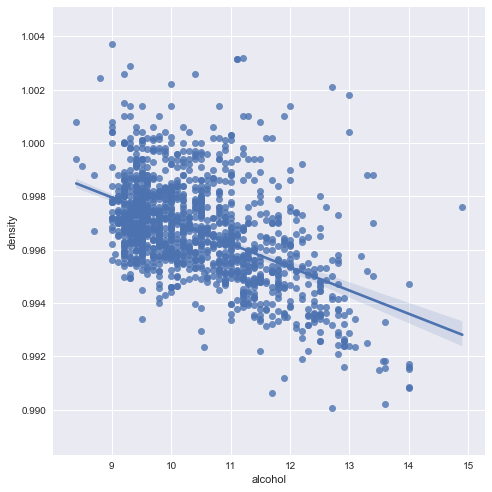

In [211]:
g = sns.lmplot(x="alcohol", y="density",
               truncate=True, size=7, data=wine)
g.set_axis_labels("alcohol", "density")
plt.show()

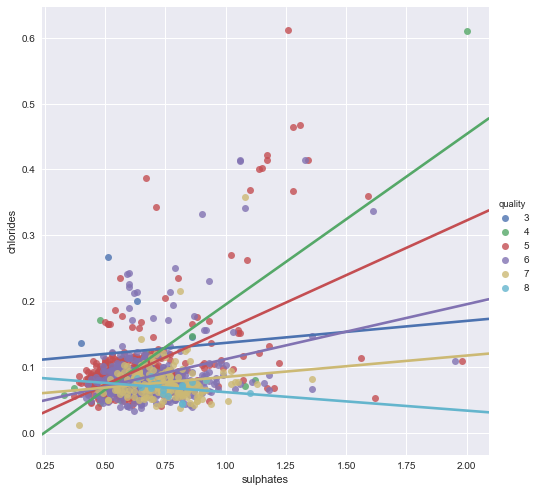

In [203]:
g = sns.lmplot(x="sulphates", y="chlorides", hue="quality",
                size=7, data=wine, ci = 0)
g.set_axis_labels("sulphates", "chlorides")
plt.show()

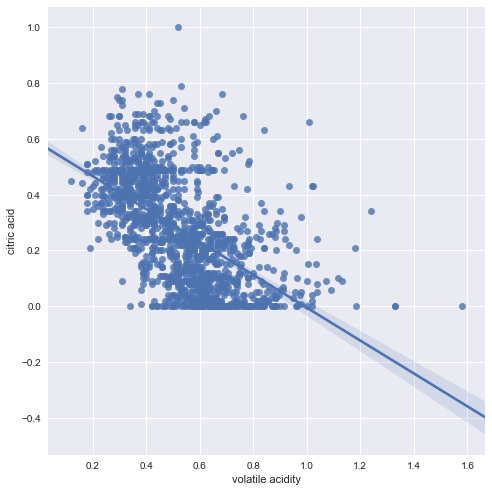

In [210]:
g = sns.lmplot(x="volatile acidity", y="citric acid",
                size=7, data=wine , palette = sns.color_palette("Blues"))
g.set_axis_labels("volatile acidity", "citric acid")
plt.show()